## Students Performance on Exams EDA


In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import warnings

warnings.filterwarnings("ignore")

## Data Loading
Let's load our data using `pandas` library.

In [3]:
df = pd.read_csv("data\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (1000, 8)


#### Exploratory Data Analysis with `pandas` and `matplotlib.pyplot`/`seaborn` for visualisation
#### Now, we will analyse the overall statistics of the data.

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


 As we can see, 3 out of 8 attributes are numerical, while the others are categorical. Additionally, we can observe some uninformative values in the `race/ethnicity` column. Since I was unable to access the original data description, I assume that labels such as 'group A,' 'group B,' 'group C,' etc., are likely anonymized representations of different racial or ethnic groups. Therefore, we will proceed with this assumption and attempt to gain insights from the data as it is.

In [7]:
df.select_dtypes(include="object").columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
from typing import List, Tuple

# Let's define a function that prints out the summary of attributes/columns
def get_columns_summary(df: pd.DataFrame, cat_threshold: int = 20) -> Tuple[List, List]:
    cols = df.columns
    categorical_cols, quantitative_cols = [], []
    for col in cols:
        if (df[col].nunique() < cat_threshold):
            categorical_cols.append(col)
        else:
            quantitative_cols.append(col)
    print(f"Categorical columns: {categorical_cols}\n")
    print("-" * 50)
    print(f"\nQuantitative columns: {quantitative_cols}\n")
    print("-" * 50)

    for col in categorical_cols:
        print(f"\n'{col}' column contains {df[col].nunique()} unique values: {df[col].unique().tolist()}")

    print()
    print("-" * 50)
    
    for col in quantitative_cols:
        print(f"\n'{col}' column contains values in a range from {df.describe().loc['min', col]} to {df.describe().loc['max', col]}")

    return categorical_cols, quantitative_cols 

In [10]:
cat_cols, quant_cols = get_columns_summary(df)

Categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

--------------------------------------------------

Quantitative columns: ['math score', 'reading score', 'writing score']

--------------------------------------------------

'gender' column contains 2 unique values: ['female', 'male']

'race/ethnicity' column contains 5 unique values: ['group B', 'group C', 'group A', 'group D', 'group E']

'parental level of education' column contains 6 unique values: ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']

'lunch' column contains 2 unique values: ['standard', 'free/reduced']

'test preparation course' column contains 2 unique values: ['none', 'completed']

--------------------------------------------------

'math score' column contains values in a range from 0.0 to 100.0

'reading score' column contains values in a range from 17.0 to 100.0

'writing score' co

In [11]:
obj_cols = df.select_dtypes(include="object").columns.tolist()

# Select columns with object or category data types
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

num_cat_cols = [col for col in cat_cols if col not in obj_cols]
num_cat_cols

[]

 So, we have no numeric-looking categorical columns.

#### Data Visualisation with `matplotlib.pyplot` and `seaborn`

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.style.use("ggplot")

<Figure size 1000x700 with 0 Axes>

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
from typing import List, Optional, Union

# Let's define the functions to plot the distributions of categorical/quantitative features with `sns.countplot` and `sns.histplot`
def plot_cat_feature_dist(
    data: pd.DataFrame, 
    col_name: str, 
    title: str, 
    order: Optional[List[str]] = None, 
    hue: Optional[str] = None, 
    palette: Optional[str] = None,
    kind: str = "count"
):
    """
    Plots the distribution of a categorical feature with optional hue.
    
    Parameters:
    - data (pd.DataFrame): The dataframe containing the data.
    - col_name (str): The name of the categorical column to plot.
    - title (str): The title for the plot or group of plot.
    - order (List[str], optional): The order of the categories in the x-axis.
    - hue (str, optional): Hue column to differentiate by.
    - palette (str, optional): Palette for the plot.
    """
    if not isinstance(data, pd.DataFrame):
        raise ValueError("The `data` parameter must be a pandas DataFrame.")
    if col_name not in data.columns:
        raise ValueError("`col_name` must be valid column name in the dataframe.")
        
    if kind == "pie":
        data = df[col_name].value_counts()
        plt.pie(x=data, labels=data.index, autopct="%1.1f%%", startangle=90)
    else:
        sns.countplot(data=data, x=col_name, order=order, hue=hue, palette=palette)
        
    plt.title(f"{title} (hue: {hue})")
    plt.show()

def plot_quantitative_feature_dist(
    data: pd.DataFrame, 
    col_name: str, 
    title: str, 
    color: Optional[str] = None, 
    palette: Optional[str] = None,
    kde: bool = False, 
    hue: Optional[str] = None
):
    """
    Plots the distribution of a quantitative feature with optional hue.

    Parameters:
    - data (pd.DataFrame): The dataframe containing the data.
    - col_name (str): The name of the quantitative column to plot.
    - title (str): The title for the plot.
    - color (str, optional): Color for the plot (if `hue` is not specified)
    - palette (str, optional): Palette for the plot.
    - kde (bool): Whether to show a kernel density estimate on the plot or not.
    - hue (str, optional): Hue column to differentiate by.
    """
    if not isinstance(data, pd.DataFrame):
        raise ValueError("The `data` parameter must be a pandas DataFrame.")
    if col_name not in data.columns:
        raise ValueError("`col_name` must be valid column name in the dataframe.")
        
    sns.histplot(data=data, x=col_name, color=color, kde=kde, hue=hue, palette=palette)
    plt.title(f"{title} (hue: {hue})")
    plt.show()

In [15]:
# Let's not define a function that plots the relationship between categorical features and one certain numerical(quantitative) feature
def plot_cat_num_relationship(
    data: pd.DataFrame, 
    cat_cols: List[str], 
    num_col: str, 
    title: Optional[str], 
    order: Optional[List[str]] = None, 
    estimator: Optional[callable] = None, 
    ci: Optional[Union[int, str]] = 95, 
    palette: Optional[str] = None, 
    rotation: Optional[int] = 0
):
    """
    Plots the relationship between categorical column(s) and a numerical column using a barplot(s).
    
    Parameters:
    - data (pd.DataFrame): The dataframe containing the data.
    - cat_cols (List[str]): The name of the categorical columns (x-axis).
    - num_col (str): The name of the numerical column (y-axis).
    - title (str): The title for the plot (if only one cat_col is provided), else: the name of numerical feature.
    - order (List[str], optional): The order of the categories on the x-axis.
    - estimator (callable, optional): The function to estimate the central tendency (e.g., mean, median).
                                      Default is `mean` if not provided.
    - ci (int or 'sd', optional): The confidence interval to draw around the estimate. Default is 95.
    - palette (str, optional): Palette for the plot.
    - rotation (int, optional): Rotation angle for x-axis labels. Default is 0.
    """
    if not isinstance(data, pd.DataFrame):
        raise ValueError("The `data` parameter must be a pandas DataFrame.")
    if not set(cat_cols).issubset(data.columns) or num_col not in data.columns:
        raise ValueError("Both `cat_cols` and `num_col` must be valid column names in the dataframe.")

    n = len(cat_cols)
    rows_num = (n + 2) // 3
        
    fix, axes = plt.subplots(rows_num, 3, figsize=(15, 5 * rows_num), constrained_layout=True)
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        sns.barplot(data=data, x=col, y=num_col, order=order, estimator=estimator, ci=ci, palette=palette, ax=axes[i])
        axes[i].set_title(f"{title} vs. {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(num_col)
        axes[i].tick_params(axis="x", labelrotation=rotation)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()


def plot_two_cat_cols_relationship(data: pd.DataFrame, x_col: str, hue_col: str, title: str = None, palette: Optional[str] = None, kind: Optional[str] = "count", rotation: Optional[int] = None):
    """
     Plots the relationship between two categorical columns using a `sns.catplot`.

     Parameters:
    - data (pd.DataFrame): The dataframe containing the data.
    - x_col (str): The name of the first categorical column (x-axis).
    - hue_col (str): The name of the second categorical column (hue).
    - title (str): The title for the plot.
    - palette (str, optional): Palette for the plot.
    - kind (str, optional): The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function (e.g., "strip", "swarm", "box", "violin", "count", etc.)
    - rotation (int, optional): Rotation angle for x-axis labels. Defaults to 0.    
    """
    if not isinstance(data, pd.DataFrame):
        raise ValueError("The `data` parameter must be a pandas DataFrame.")
    if x_col not in data.columns or hue_col not in data.columns:
        raise ValueError("Both `x_col` and `hue_col` must be valid column names in the dataframe.")
        
    sns.catplot(data=data, x=x_col, hue=hue_col, palette=palette, kind=kind)
    plt.title(title if title else f"{x_col} vs. {hue_col}")
    plt.xticks(rotation=rotation)
    plt.show()

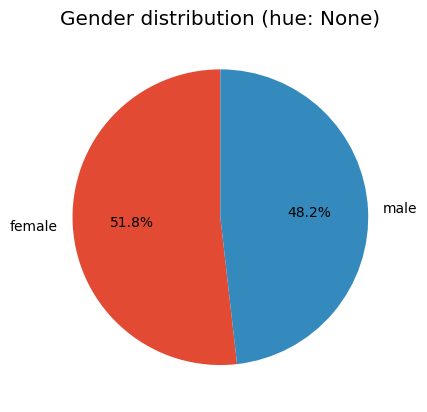

In [16]:
# Let's visualise the distribution of gender categories
plot_cat_feature_dist(data=df, col_name="gender", title="Gender distribution", kind="pie")

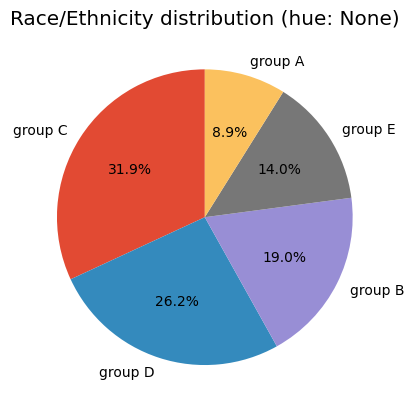

In [17]:
plot_cat_feature_dist(data=df, col_name="race/ethnicity", title="Race/Ethnicity distribution", kind="pie")

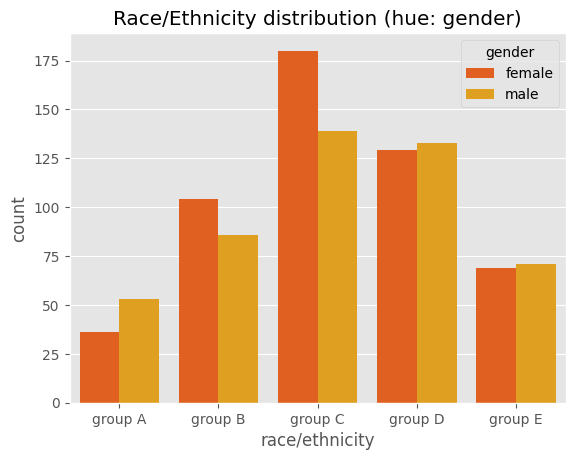

In [18]:
# Let's visualise the distribution of race/ethnicity categories with gender differentiation
plot_cat_feature_dist(data=df, col_name="race/ethnicity", hue="gender", palette="autumn", order=["group A", "group B", "group C", "group D", "group E"], title="Race/Ethnicity distribution")

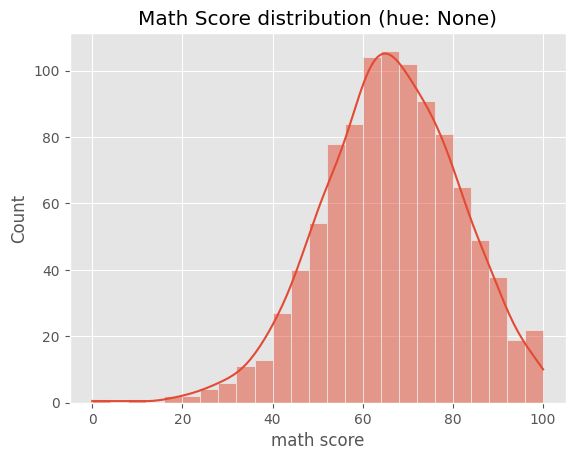

In [19]:
# Let's now check the distributions of scores (math, reading, writing)
plot_quantitative_feature_dist(data=df, col_name="math score", title="Math Score distribution", kde=True)

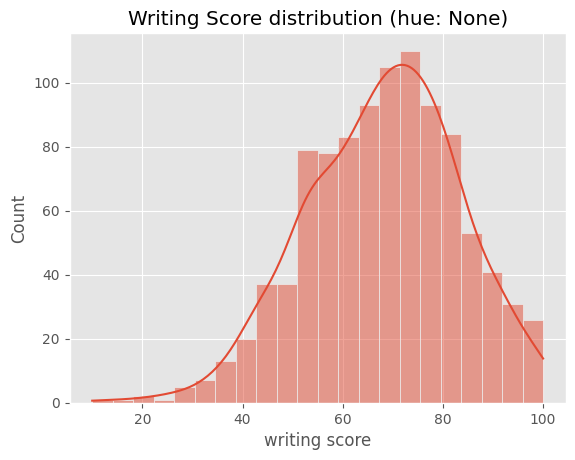

In [20]:
plot_quantitative_feature_dist(data=df, col_name="writing score", title="Writing Score distribution", kde=True)

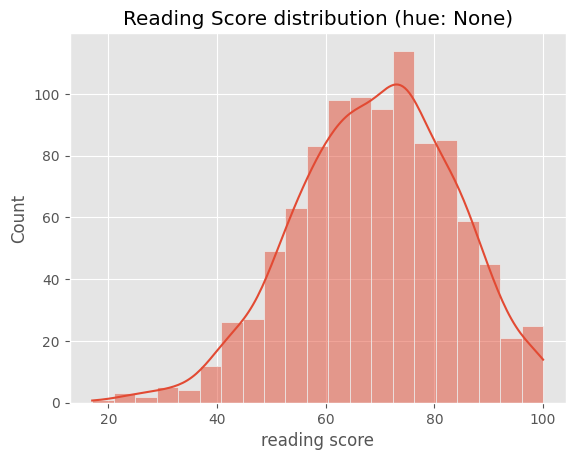

In [21]:
plot_quantitative_feature_dist(data=df, col_name="reading score", title="Reading Score distribution", kde=True)

 We can observe some kind of a left (negative) skewness in our scores data, which can affect the performance of different models (e.g., linear regression) and also disrupt scaling methods (e.g., Min-Max scaling). We can fix it by `log transformation`/`square root transformation`/`box-cox transformation` ad we'll do it later.

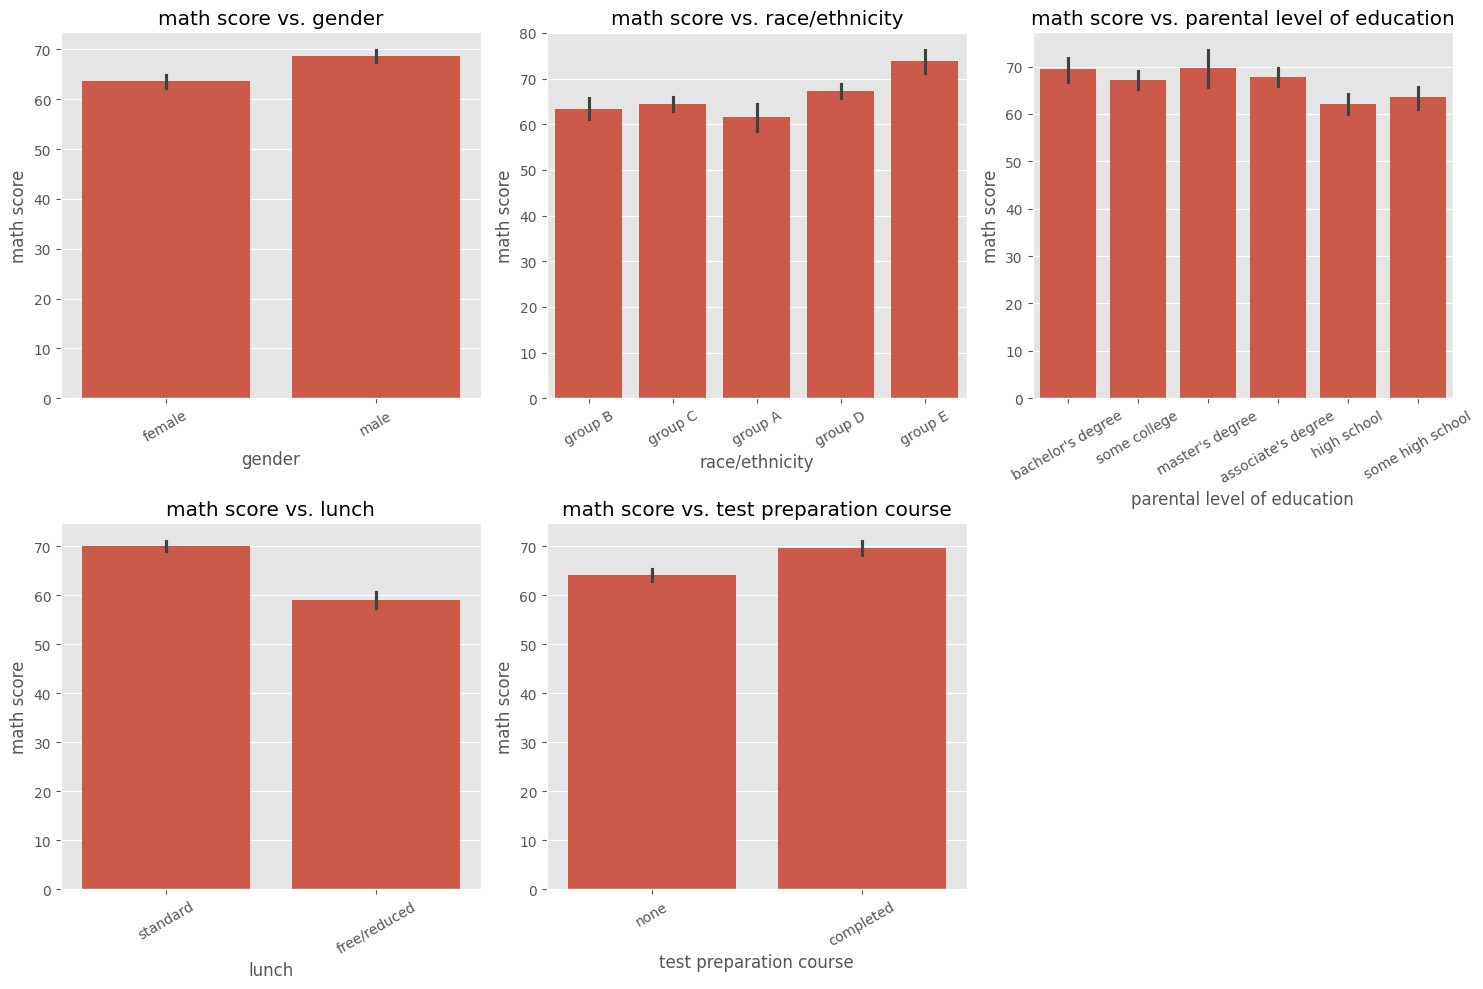

In [22]:
# Let's check now the relationship between the categorical features and Math score
plot_cat_num_relationship(data=df, cat_cols=cat_cols, num_col="math score", title="math score", estimator="mean", rotation=30)

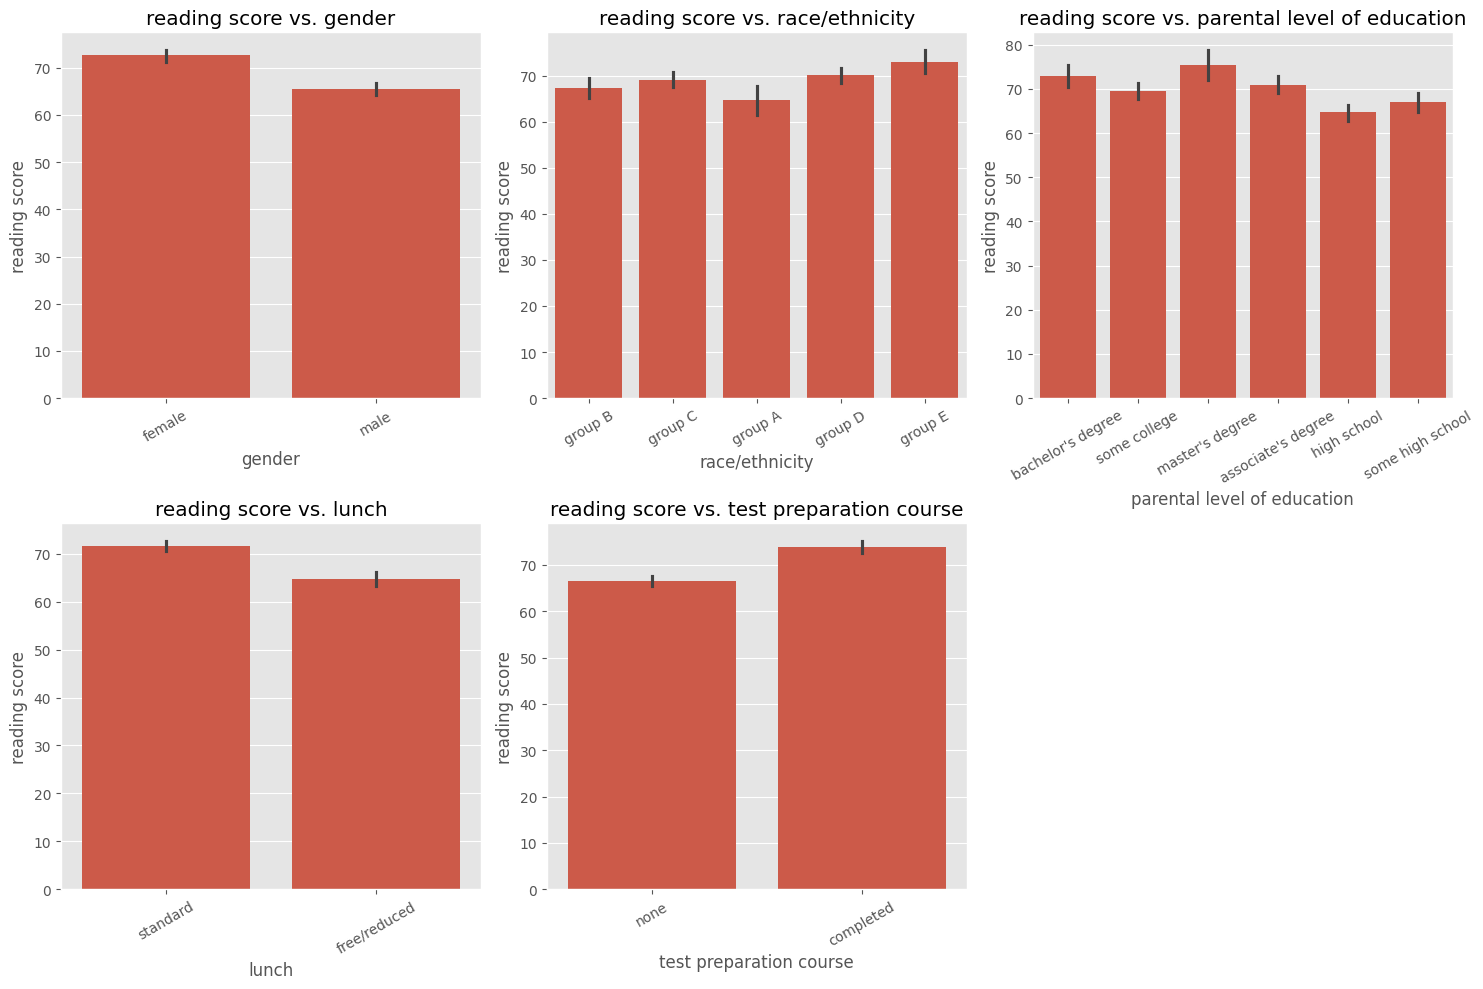

In [23]:
# Let's do the same with reading/writing scores
plot_cat_num_relationship(data=df, cat_cols=cat_cols, num_col="reading score", title="reading score", estimator="mean", rotation=30)

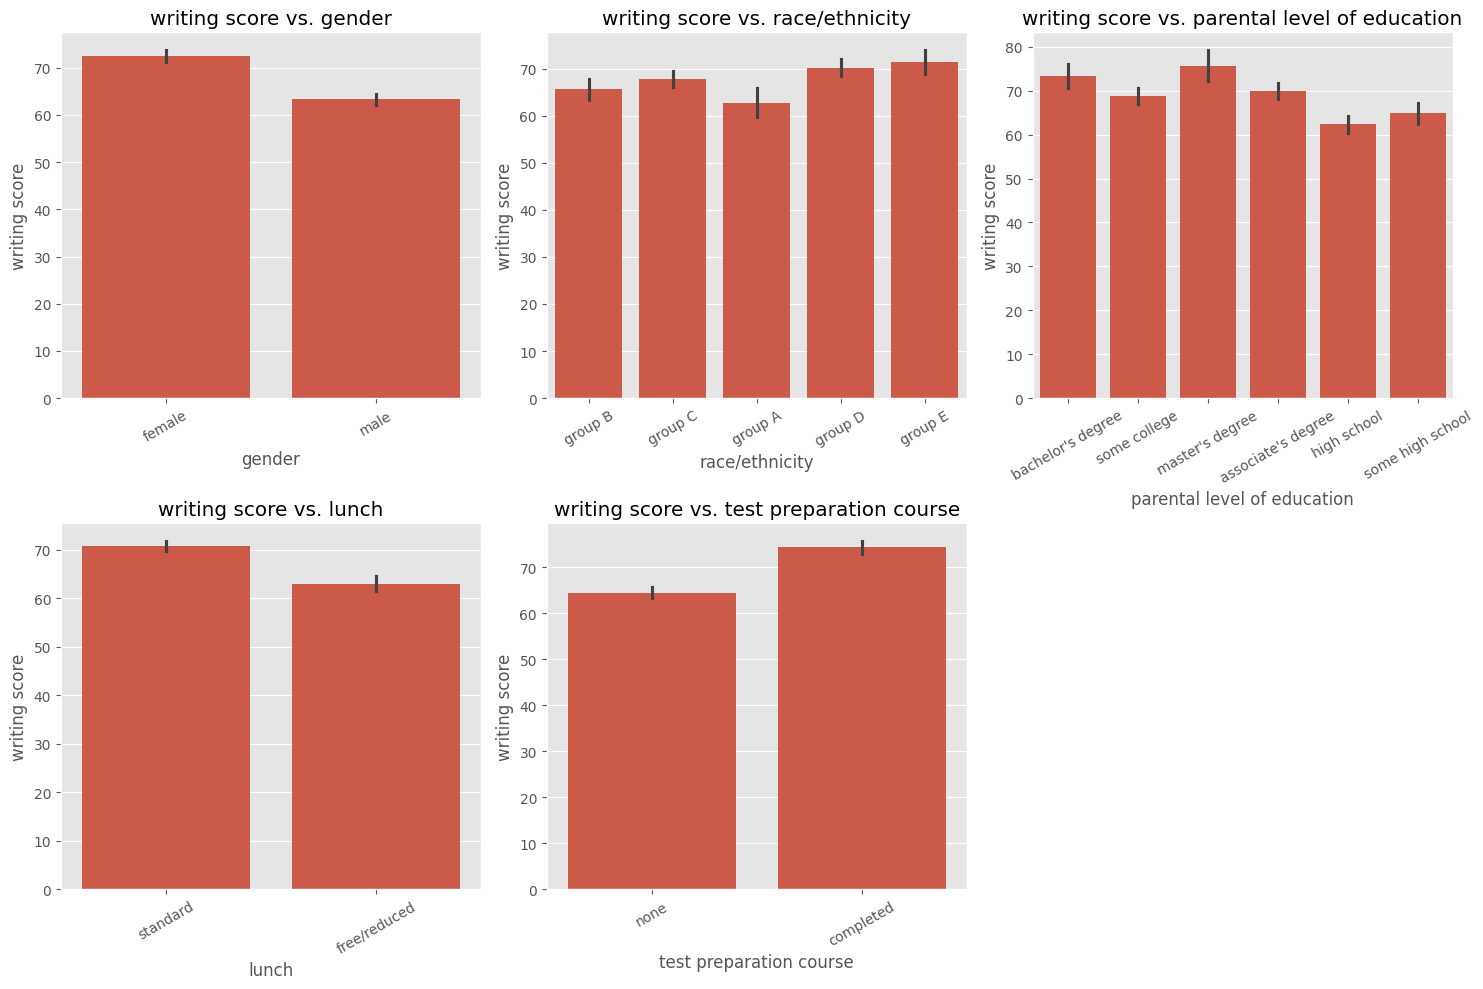

In [24]:
plot_cat_num_relationship(data=df, cat_cols=cat_cols, num_col="writing score", title="writing score", estimator="mean", rotation=30)

As we can see, certain attributes appear to affect student scores. For instance, the mean scores of students who have completed a `test preparation course` or have a `standard lunch` are higher compared to those who have not attended a preparation course or have `free/reduced lunch`. Additionally, students whose parents have completed some form of `higher education` tend to achieve higher scores than those whose parents have less formal education.

Let's now actually check the relationships between some categorical features:

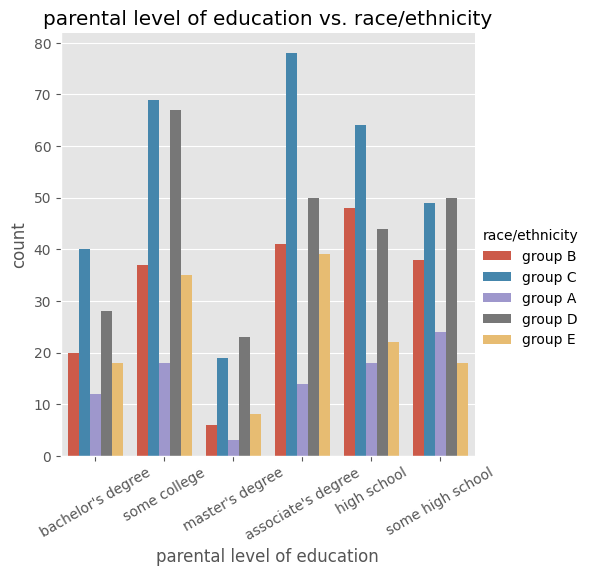

In [25]:
plot_two_cat_cols_relationship(data=df, x_col="parental level of education", hue_col="race/ethnicity", kind="count", rotation=30)

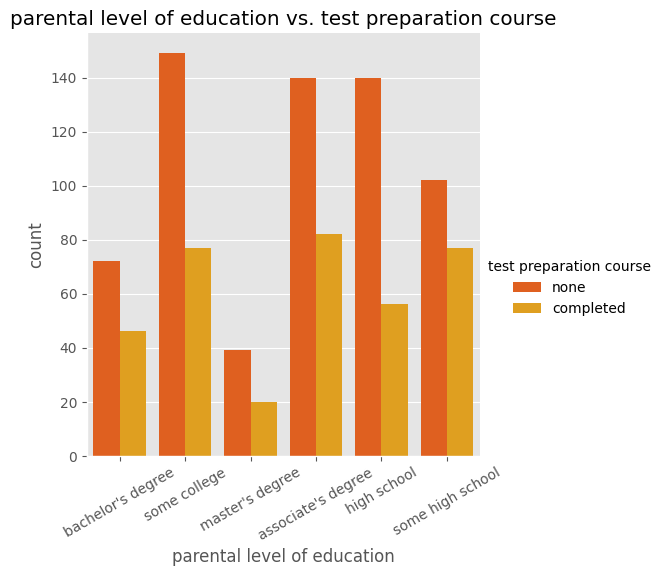

In [26]:
plot_two_cat_cols_relationship(data=df, x_col="parental level of education", hue_col="test preparation course", rotation=30, palette="autumn")

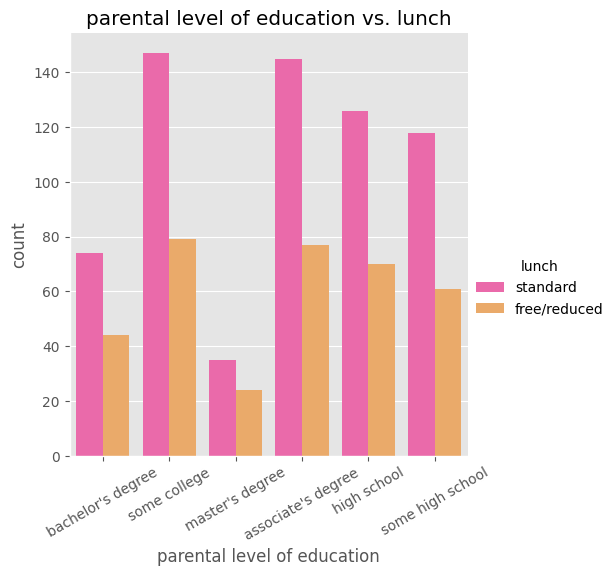

In [27]:
plot_two_cat_cols_relationship(data=df, x_col="parental level of education", hue_col="lunch", rotation=30, palette="spring")

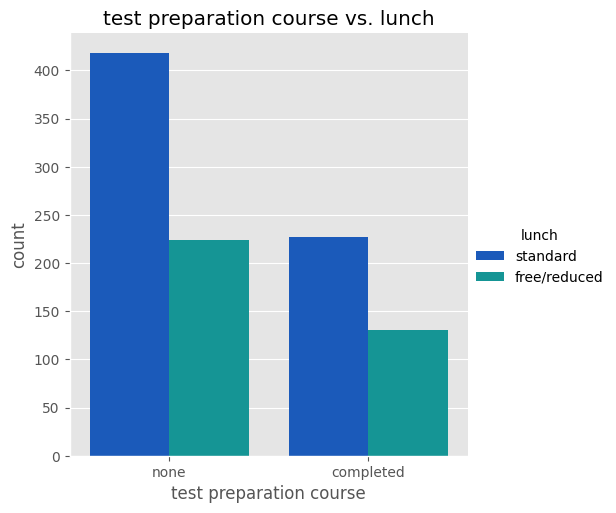

In [28]:
plot_two_cat_cols_relationship(data=df, x_col="test preparation course", hue_col="lunch", palette="winter")

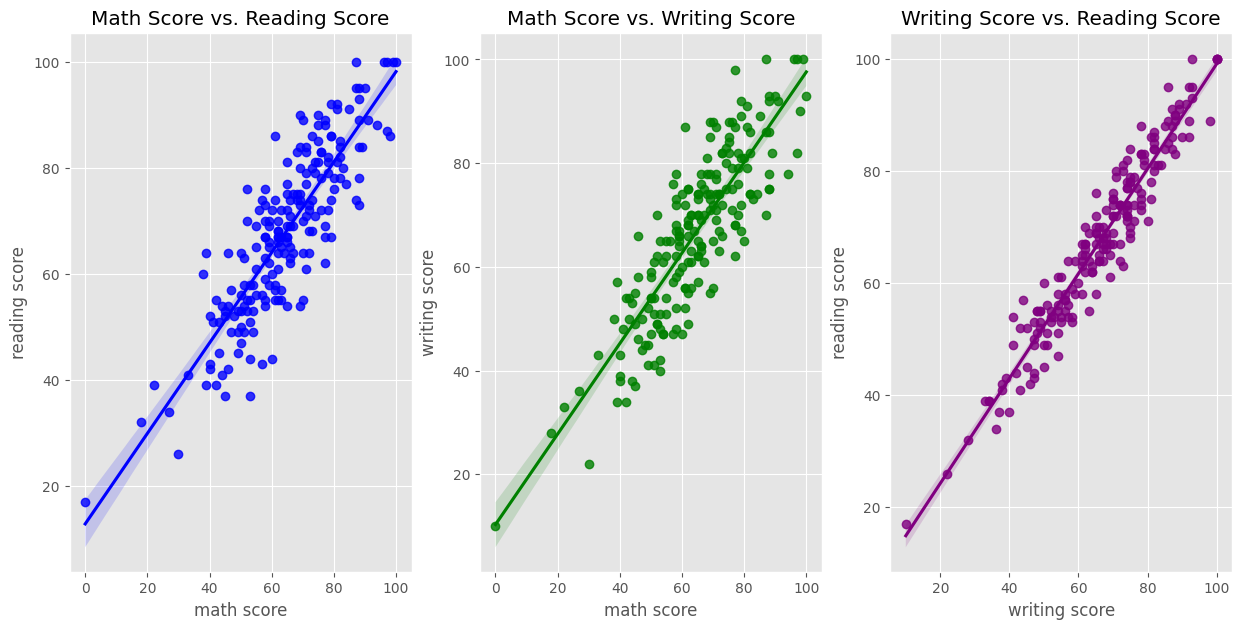

In [29]:
# Let's now plot the relationship between scores (e.g., "Math Score vs. Reading Score")
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
sns.regplot(data=df[:200], x="math score", y="reading score", color="b")
plt.title("Math Score vs. Reading Score")

plt.subplot(1, 3, 2)
sns.regplot(data=df[:200], x="math score", y="writing score", color="g")
plt.title("Math Score vs. Writing Score")

plt.subplot(1, 3, 3)
sns.regplot(data=df[:200], x="writing score", y="reading score", color="purple")
plt.title("Writing Score vs. Reading Score")

plt.show()

 We can clearly see a linear correlation between the scores, which means that students who scored high in one subject were likely to score high in all subjects. 
 In addition to this, the plots show that the variance in reading and writing scores is higher when correlated with math scores, resulting in a wider spread. In contrast, the correlation between writing and reading scores exhibits significantly lower variance, indicating a closer relationship between these two subjects.

## Data Preprocessing

### Ordinal Encoding

To facilitate our work with data, I was considering mapping the values of `gender` and `test preparation course` features (as they are binary) to the values `0` and `1`, and `parental level of education` to the values in range from `0` to `5`, but I have realised that some algorithms might interpret the values as ordinal (e.g., `0 < 1`), even though there's no such hierarchy, therefore I will only modify `test preparation course` and `parental level of education`, because these columns actually represent some kind of a hierarchy.

In [30]:
# df["gender"] = df["gender"].map(lambda x: 0 if x == "male" else (1 if x == "female" else -1))
# df.head()

In [31]:
education_order = {
    'some high school': 0,
    'high school': 1,
    "associate's degree": 2,
    'some college': 3,
    "bachelor's degree": 4,
    "master's degree": 5
}

df['parental level of education'] = df['parental level of education'].map(education_order)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,4,standard,none,72,72,74
1,female,group C,3,standard,completed,69,90,88
2,female,group B,5,standard,none,90,95,93
3,male,group A,2,free/reduced,none,47,57,44
4,male,group C,3,standard,none,76,78,75


In [32]:
df["test preparation course"] = df["test preparation course"].map(lambda x: 0 if x == "none" else (1 if x == "completed" else -1))
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
569,male,group D,4,free/reduced,0,68,68,67
953,male,group C,1,standard,1,58,52,54
20,male,group D,1,standard,0,66,69,63
918,female,group C,2,standard,1,57,77,80
818,female,group B,1,free/reduced,0,60,72,68
448,male,group B,1,standard,0,47,46,42
258,female,group B,3,standard,0,70,75,78
194,female,group C,5,standard,1,69,84,85
570,male,group B,3,standard,1,71,75,70
793,male,group E,0,standard,1,89,84,77


#### One-Hot Encoding with `sklear.preprocessing.OneHotEncoder`
##### On other categorical features we will use `one-hot encoding` as those features have more than two categories and their values have *no ordinal relationship*.
We could use `pd.get_dummies(...)` method, but I'll proceed with Scikit-learn's `OneHotEncoder`.


With `OneHotEncoder` we are using the `drop="first"` parameter to avoid multicollinearity, which can occur while working with some ml models (e.g., linear regression, logistic regression, etc.), it also simplifies the model. But models like decision trees, random forests, or gradient boosting are not affected by multicollinearity. In these cases, you don't need to drop the first feature.

In [33]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first")

In [34]:
columns_to_encode = ["gender", "race/ethnicity", "lunch"]

encoded_columns = one_hot_encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(data=encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

encoded_df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)
encoded_df.head()

,parental level of education,test preparation course,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard
0,4,0,72,72,74,0.0,1.0,0.0,0.0,0.0,1.0
1,3,1,69,90,88,0.0,0.0,1.0,0.0,0.0,1.0
2,5,0,90,95,93,0.0,1.0,0.0,0.0,0.0,1.0
3,2,0,47,57,44,1.0,0.0,0.0,0.0,0.0,0.0
4,3,0,76,78,75,1.0,0.0,1.0,0.0,0.0,1.0


In [35]:
encoded_df.describe()

,parental level of education,test preparation course,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.085000,0.358000,66.08900,69.169000,68.054000,0.482000,0.190000,0.319000,0.262000,0.140000,0.645000
std,1.461476,0.479652,15.16308,14.600192,15.195657,0.499926,0.392497,0.466322,0.439943,0.347161,0.478753
min,0.000000,0.000000,0.00000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,57.00000,59.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,66.00000,70.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,77.00000,79.000000,79.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,5.000000,1.000000,100.00000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Min-Max Scaling Some Features

Let's use `Min-Max Scaling` normalisation technique for `parental level of education`, `math score`, `reading score` and `writing score` features to scale the data to the range [0, 1]. It will help us to work with models that are sensitive to feature magnitude, such as KNN, SVMs, etc.

In [36]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ["parental level of education", "math score", "reading score", "writing score"]
scaler = MinMaxScaler(feature_range=(0, 1))  # (0, 1) is the deafult range

In [37]:
scaler.fit(encoded_df[cols_to_scale])

MinMaxScaler()

In [38]:
encoded_df[cols_to_scale] = scaler.transform(encoded_df[cols_to_scale])
encoded_df.head()

,parental level of education,test preparation course,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard
0,0.8,0,0.72,0.662651,0.711111,0.0,1.0,0.0,0.0,0.0,1.0
1,0.6,1,0.69,0.879518,0.866667,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0,0.90,0.939759,0.922222,0.0,1.0,0.0,0.0,0.0,1.0
3,0.4,0,0.47,0.481928,0.377778,1.0,0.0,0.0,0.0,0.0,0.0
4,0.6,0,0.76,0.734940,0.722222,1.0,0.0,1.0,0.0,0.0,1.0


In [39]:
encoded_df.describe()

,parental level of education,test preparation course,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.417000,0.358000,0.660890,0.628542,0.645044,0.482000,0.190000,0.319000,0.262000,0.140000,0.645000
std,0.292295,0.479652,0.151631,0.175906,0.168841,0.499926,0.392497,0.466322,0.439943,0.347161,0.478753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.570000,0.506024,0.530556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.000000,0.660000,0.638554,0.655556,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.600000,1.000000,0.770000,0.746988,0.766667,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   parental level of education  1000 non-null   float64
 1   test preparation course      1000 non-null   int64  
 2   math score                   1000 non-null   float64
 3   reading score                1000 non-null   float64
 4   writing score                1000 non-null   float64
 5   gender_male                  1000 non-null   float64
 6   race/ethnicity_group B       1000 non-null   float64
 7   race/ethnicity_group C       1000 non-null   float64
 8   race/ethnicity_group D       1000 non-null   float64
 9   race/ethnicity_group E       1000 non-null   float64
 10  lunch_standard               1000 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


We have no null values; therefore, we don't have to use any imputing techniques here.

### Now our data is ready for model training.